Plot data showing behaviour of kappa as a function of block heterogeneity.

Created on: 16/01/20

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import ast
import glob
import seaborn as sns

In [10]:

def make_markup_as_kap_plot(K_11_vals,beta_f,markup_data) : 
    K_22=5.5
    K_11_vals = [p/K_22 for p in K_11_vals]

    M_IIM_Vals = list(markup_data['M(full)'])
    M_IIM_SEs = list(markup_data['M(full)_SE'])

    M_Block_Vals = list(markup_data['M(block)'])
    M_Block_SEs = list(markup_data['M(block)_SE'])

    M_Unif_Vals = list(markup_data['M(uniform)'])
    M_Unif_SEs = list(markup_data['M(uniform)_SE'])

    # Budget_Vals = list(markup_data['H'])

    Full_Markups = [(i - j) for i, j in zip(M_IIM_Vals, M_Unif_Vals)]
    # Standard error propagation formula on the SEs:
    Full_Markup_SEs = [(i ** 2 + j ** 2) ** 0.5 for i, j in zip(M_IIM_SEs, M_Unif_SEs)]

    Block_Markups = [(i - j) for i, j in zip(M_Block_Vals, M_Unif_Vals)]
    # Standard error propagation formula on the SEs:
    Block_Markup_SEs = [(i ** 2 + j ** 2) ** 0.5 for i, j in zip(M_Block_SEs, M_Unif_SEs)]

    fig, ax = plt.subplots(figsize=(6, 6))
    plt.clf()
    plt.errorbar(K_11_vals, Full_Markups, yerr=Full_Markup_SEs, fmt='bo', label="Full Graph")
    plt.plot(K_11_vals, Full_Markups, 'b')

    plt.errorbar(K_11_vals, Block_Markups, yerr=Block_Markup_SEs, fmt='rs', label="Block Level")
    plt.plot(K_11_vals, Block_Markups, 'r')

    plt.plot(K_11_vals,np.zeros(len(K_11_vals)),'k--')

    plt.xlabel("${K_{11}}/{K_{22}}$", fontsize=20)
    plt.ylabel("$\\Delta M_{MC}$", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylim(-0.01, 0.030)
    
    
    
    if beta_f==0.5:
        plt.text(0.5,0.025,"(a)",fontsize=30)
    elif beta_f == 1.2 :
        plt.text(0.5,0.025,"(b)",fontsize=30)
    elif beta_f==1.5:
        plt.text(0.5,0.025,"(c)",fontsize=30)
        plt.legend(fontsize=15, loc='upper right')
    plt.savefig(f"Plots/markup_as_K11_{beta_f}".replace('.', '-') +".jpg" , bbox_inches='tight')
    

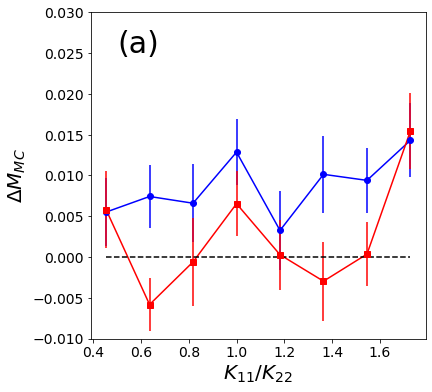

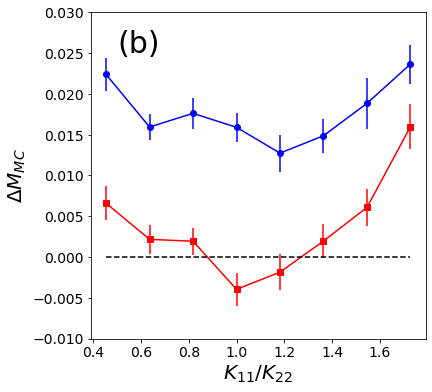

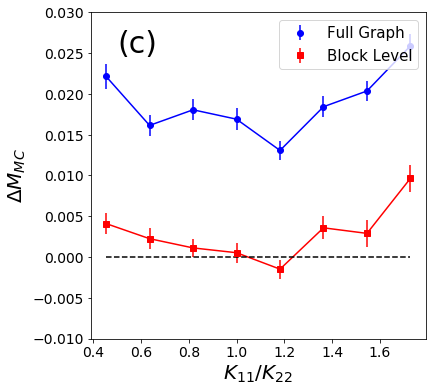

In [11]:
K_11_vals = np.arange(2.5,10.5,1.0)
for beta_f in [0.5,1.2,1.5] : 
    markup_data = pd.DataFrame()
    for k_11 in K_11_vals :
        current_df=pd.read_csv(f"Data/as_kap_data/{k_11}_kappa_two_block_data_spins1-0_bf_{beta_f}".replace(".","-") + ".csv")
        current_df['k_11']=[k_11]
        markup_data=markup_data.append(current_df)
    make_markup_as_kap_plot(K_11_vals,beta_f,markup_data)

##### sns.scatterplot(data=markup_data,x='k_11',y='M(uniform)' )
sns.scatterplot(data=markup_data,x='k_11',y='M(block)' )
sns.scatterplot(data=markup_data,x='k_11',y='M(full)' )